## Analyzing Used Car Listings - dataset by thedevastator
https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices/data

We will be working on a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The aim of this project is to clean the data and analyze the included used car listings.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_dict = pd.read_csv("autos_dict.csv")
print("The data dictionary provided with data is as follows: \n", df_dict.to_markdown())

The data dictionary provided with data is as follows: 
 |    | colum_name          |  description                                                               |
|---:|:--------------------|:---------------------------------------------------------------------------|
|  0 | dateCrawled         | When this ad was first crawled. All field-values are taken from this date. |
|  1 | name                | Name of the car.                                                           |
|  2 | seller              | Whether the seller is private or a dealer.                                 |
|  3 | offerType           | The type of listing                                                        |
|  4 | price               | The price on the ad to sell the car.                                       |
|  5 | abtest              | Whether the listing is included in an A/B test.                            |
|  6 | vehicleType         | The vehicle Type.                                                  

In [35]:
df = pd.read_csv("autos.csv", encoding='Latin-1')
df = df[df.columns[1:]]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [36]:
shape = df.shape[1]
type_0_name = str(df.dtypes.value_counts().index[0])
type_0_total = df.dtypes.value_counts().values[0]
type_1_name = df.dtypes.value_counts().index[1]
type_1_total = df.dtypes.value_counts().values[1]
null_columns_count = df.isnull().any().sum()
null_value = ((df.isnull().sum() / df.notna().sum()).round(3) * 100).max().round()

In [37]:
print(
    "Our dataset contains",
    shape,
    "columns, which",
    type_0_total,
    "are stored as",
    type_0_name,
    "and",
    type_1_total,
    "are stored as",
    type_1_name,
    ".",
)
print(
    "There are",
    null_columns_count,
    "columns with null values,",
    "but no columns have more than",
    null_value,
    "% of null values",
)
print("There are some columns that contain dates stored as strings.")

Our dataset contains 20 columns, which 13 are stored as object and 7 are stored as int64 .
There are 5 columns with null values, but no columns have more than 24.0 % of null values
There are some columns that contain dates stored as strings.


## Clear columns

In [38]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [39]:
df.columns = [
    "date_crawled",
    "name",
    "seller",
    "offer_type",
    "price",
    "ab_test",
    "vehicle_type",
    "registration_year",
    "gearbox",
    "power_ps",
    "model",
    "odometer",
    "registration_month",
    "fuel_type",
    "brand",
    "unrepaired_damage",
    "ad_created",
    "num_photos",
    "postal_code",
    "last_seen",
]
df.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Initial Data Exploration and Cleaning

We'll start by exploring the data to find obvious areas where we can clean the data.

In [40]:
df.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


Our initial observations:

There are a number of text columns where all (or nearly all) of the values are the same:
* seller
* offer_type

The num_photos column looks odd, we'll need to investigate this further.

In [41]:
df["num_photos"].value_counts()

num_photos
0    371528
Name: count, dtype: int64

It looks like the **num_photos** column has 0 for every column. We'll drop this column, plus the other two we noted as mostly one value.

In [42]:
df = df.drop(["num_photos", "seller", "offer_type"], axis=1)

Detect outliers

In [96]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers
outliers = detect_outliers_iqr(df['price'])

print(f"Number of outliers detected: {sum(outliers)}")

Number of outliers detected: 28108


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot
ax1.scatter(range(len(df)), df['price'], c=['blue' if not x else 'red' for x in outliers])
ax1.set_title('Dataset with Outliers Highlighted (Scatter Plot)')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')

# Box plot
sns.boxplot(x=df['price'], ax=ax2)
ax2.set_title('Dataset with Outliers (Box Plot)')
ax2.set_xlabel('Value')

plt.tight_layout()
plt.show()

Original dataset size: 371528
Cleaned dataset size: 343420


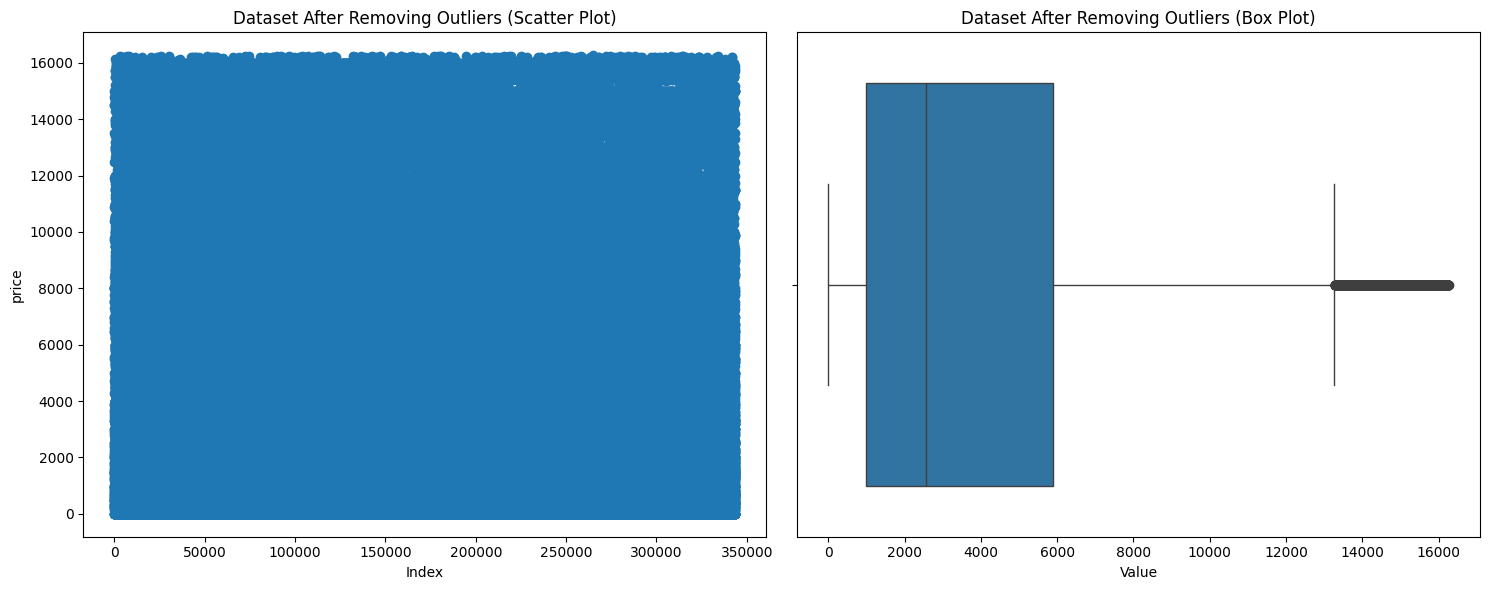

In [106]:
# Remove outliers
data_cleaned = df[~outliers]

print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(data_cleaned)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot
ax1.scatter(range(len(data_cleaned)), data_cleaned['price'])
ax1.set_title('Dataset After Removing Outliers (Scatter Plot)')
ax1.set_xlabel('Index')
ax1.set_ylabel('price')

# Box plot
sns.boxplot(x=data_cleaned['price'], ax=ax2)
ax2.set_title('Dataset After Removing Outliers (Box Plot)')
ax2.set_xlabel('Value')

plt.tight_layout()
plt.show()